In [3]:
import pandas as pd
data=pd.read_csv("/content/kc_house_data.csv", sep=',')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


We import the DATA and display it.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We can see that the data has many features and that most of them are floats or ints, besides of the date feature. 

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see that the main statistical indicators do not really give us sustainable data to work with. But still, we can notice some evidences like in the bedroom feature were the maximum is definitely an outlier to eliminate since it is so far away from the mean and the median. We can also see that the data is not stardardized nor normalized wich is one of the first main things we should do in the next steps.

We will now try and treat the features one by one according to the relevency we think they have each in a different way. 

---


**1-**First we do not think the **ID** nor the **Latitude** and **Langitude** are relevent features, that is why we decide to drop them from the data going into trainig. We will also drop the **sqft_living** and **sqft_lot** since there is an update for 2015 in some other features.


---
**2-**Second we think it should be interesting to keep as they already are the following features : **Waterfront, View, Grade, Condition**.
On the other hand we have features that need very few treatement such as : **Bedrooms (Outlier), Bathrooms (Round), Floors (Round), Zipcode (Simplify).**

---
**3-**As a thrid step we will treat the features that remain a little bit more cleverly. Eliminate the colums **Sqft_Basement** and **Sqft_Above** and just create a new feature called **Basement_%** wich will represent a percentage of how much of the total area the basement's area does represent. We will also remove the features **yr_built** and **yr_renovated** with one single feature that will have the year the house have been renovated in, if it has never been renovated we will fill it with the year it was built in, we will call that feature **yr_last_renov**.

---
**4-**As a fourth and last step in the data pre-processing part, we will try and transform the continuous data to discret data wich will make it way more readable and easy to manage. The concerned features are : **sqft_living15, sqft_lot15, Date, yr_last_renov,** and **Price**.
We will of course have to choose the right number of categories and the different ranges for each feature.




In [4]:
data.drop(['id','lat','long','sqft_living','sqft_lot'], axis=1, inplace=True)
data

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,20150223T000000,400000.0,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,20140623T000000,402101.0,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,20150116T000000,400000.0,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [5]:
area_missing_value=int(data["sqft_living15"][data["bedrooms"]==33])
e1=area_missing_value-0.2*area_missing_value
e2=area_missing_value+0.2*area_missing_value
bedrooms_new_value=int((data["bedrooms"][(data["sqft_living15"]>e1) & (data["sqft_living15"]<e2)]).mode())
data["bedrooms"].replace(33,bedrooms_new_value,inplace=True)
data.describe()
#The outlier in bedrooms has now been replaced with the Mode we can find in homes with similar area size.


,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.369454,2.114757,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.907964,0.770163,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [6]:
data["bathrooms"]=data["bathrooms"].round()
data["floors"]=data["floors"].round()
data


,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,20141209T000000,538000.0,3,2.0,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,20150225T000000,180000.0,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,20141209T000000,604000.0,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,20150218T000000,510000.0,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.0,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,20150223T000000,400000.0,4,2.0,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,20140623T000000,402101.0,2,1.0,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,20150116T000000,400000.0,3,2.0,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [7]:
def new_date (x) :
    return x[0:4]

data["date"]=data["date"].apply(new_date)
data

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,2014,538000.0,3,2.0,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2015,180000.0,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2014,604000.0,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,2015,510000.0,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [8]:
data["Age"]= data["date"].astype(int) - data["yr_built"]
data

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age
0,2014,221900.0,3,1.0,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,59
1,2014,538000.0,3,2.0,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,63
2,2015,180000.0,2,1.0,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,82
3,2014,604000.0,4,3.0,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,49
4,2015,510000.0,3,2.0,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,5
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,1
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,5
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,11


In [9]:
for i in range (0,21613)  :
  if data["yr_renovated"][i]==0 :
    data["yr_renovated"][i]=data["yr_built"][i]
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age
0,2014,221900.0,3,1.0,1.0,0,0,3,7,1180,0,1955,1955,98178,1340,5650,59
1,2014,538000.0,3,2.0,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,63
2,2015,180000.0,2,1.0,1.0,0,0,3,6,770,0,1933,1933,98028,2720,8062,82
3,2014,604000.0,4,3.0,1.0,0,0,5,7,1050,910,1965,1965,98136,1360,5000,49
4,2015,510000.0,3,2.0,1.0,0,0,3,8,1680,0,1987,1987,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,1530,0,2009,2009,98103,1530,1509,5
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,2310,0,2014,2014,98146,1830,7200,1
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,1020,0,2009,2009,98144,1020,2007,5
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,1600,0,2004,2004,98027,1410,1287,11


In [10]:
data["sqft_basement%"]=data["sqft_basement"]*100/data["sqft_living15"]
data

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age,sqft_basement%
0,2014,221900.0,3,1.0,1.0,0,0,3,7,1180,0,1955,1955,98178,1340,5650,59,0.000000
1,2014,538000.0,3,2.0,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,63,23.668639
2,2015,180000.0,2,1.0,1.0,0,0,3,6,770,0,1933,1933,98028,2720,8062,82,0.000000
3,2014,604000.0,4,3.0,1.0,0,0,5,7,1050,910,1965,1965,98136,1360,5000,49,66.911765
4,2015,510000.0,3,2.0,1.0,0,0,3,8,1680,0,1987,1987,98074,1800,7503,28,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,1530,0,2009,2009,98103,1530,1509,5,0.000000
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,2310,0,2014,2014,98146,1830,7200,1,0.000000
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,1020,0,2009,2009,98144,1020,2007,5,0.000000
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,1600,0,2004,2004,98027,1410,1287,11,0.000000


In [11]:
for i in range (0,21613) :
  data["zipcode"][i]=data["zipcode"][i] - 98000
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age,sqft_basement%
0,2014,221900.0,3,1.0,1.0,0,0,3,7,1180,0,1955,1955,178,1340,5650,59,0.000000
1,2014,538000.0,3,2.0,2.0,0,0,3,7,2170,400,1951,1991,125,1690,7639,63,23.668639
2,2015,180000.0,2,1.0,1.0,0,0,3,6,770,0,1933,1933,28,2720,8062,82,0.000000
3,2014,604000.0,4,3.0,1.0,0,0,5,7,1050,910,1965,1965,136,1360,5000,49,66.911765
4,2015,510000.0,3,2.0,1.0,0,0,3,8,1680,0,1987,1987,74,1800,7503,28,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,1530,0,2009,2009,103,1530,1509,5,0.000000
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,2310,0,2014,2014,146,1830,7200,1,0.000000
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,1020,0,2009,2009,144,1020,2007,5,0.000000
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,1600,0,2004,2004,27,1410,1287,11,0.000000


In [12]:
data.drop(['sqft_above','sqft_basement','yr_built'], axis=1, inplace=True)
data

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_renovated,zipcode,sqft_living15,sqft_lot15,Age,sqft_basement%
0,2014,221900.0,3,1.0,1.0,0,0,3,7,1955,178,1340,5650,59,0.000000
1,2014,538000.0,3,2.0,2.0,0,0,3,7,1991,125,1690,7639,63,23.668639
2,2015,180000.0,2,1.0,1.0,0,0,3,6,1933,28,2720,8062,82,0.000000
3,2014,604000.0,4,3.0,1.0,0,0,5,7,1965,136,1360,5000,49,66.911765
4,2015,510000.0,3,2.0,1.0,0,0,3,8,1987,74,1800,7503,28,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,2009,103,1530,1509,5,0.000000
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,2014,146,1830,7200,1,0.000000
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,2009,144,1020,2007,5,0.000000
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,2004,27,1410,1287,11,0.000000


In [13]:
data["Age_Renov"]= data["date"].astype(int) - data["yr_renovated"]
data.drop(['yr_renovated'], axis=1, inplace=True)
data

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_lot15,Age,sqft_basement%,Age_Renov
0,2014,221900.0,3,1.0,1.0,0,0,3,7,178,1340,5650,59,0.000000,59
1,2014,538000.0,3,2.0,2.0,0,0,3,7,125,1690,7639,63,23.668639,23
2,2015,180000.0,2,1.0,1.0,0,0,3,6,28,2720,8062,82,0.000000,82
3,2014,604000.0,4,3.0,1.0,0,0,5,7,136,1360,5000,49,66.911765,49
4,2015,510000.0,3,2.0,1.0,0,0,3,8,74,1800,7503,28,0.000000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,103,1530,1509,5,0.000000,5
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,146,1830,7200,1,0.000000,1
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,144,1020,2007,5,0.000000,5
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,27,1410,1287,11,0.000000,11


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

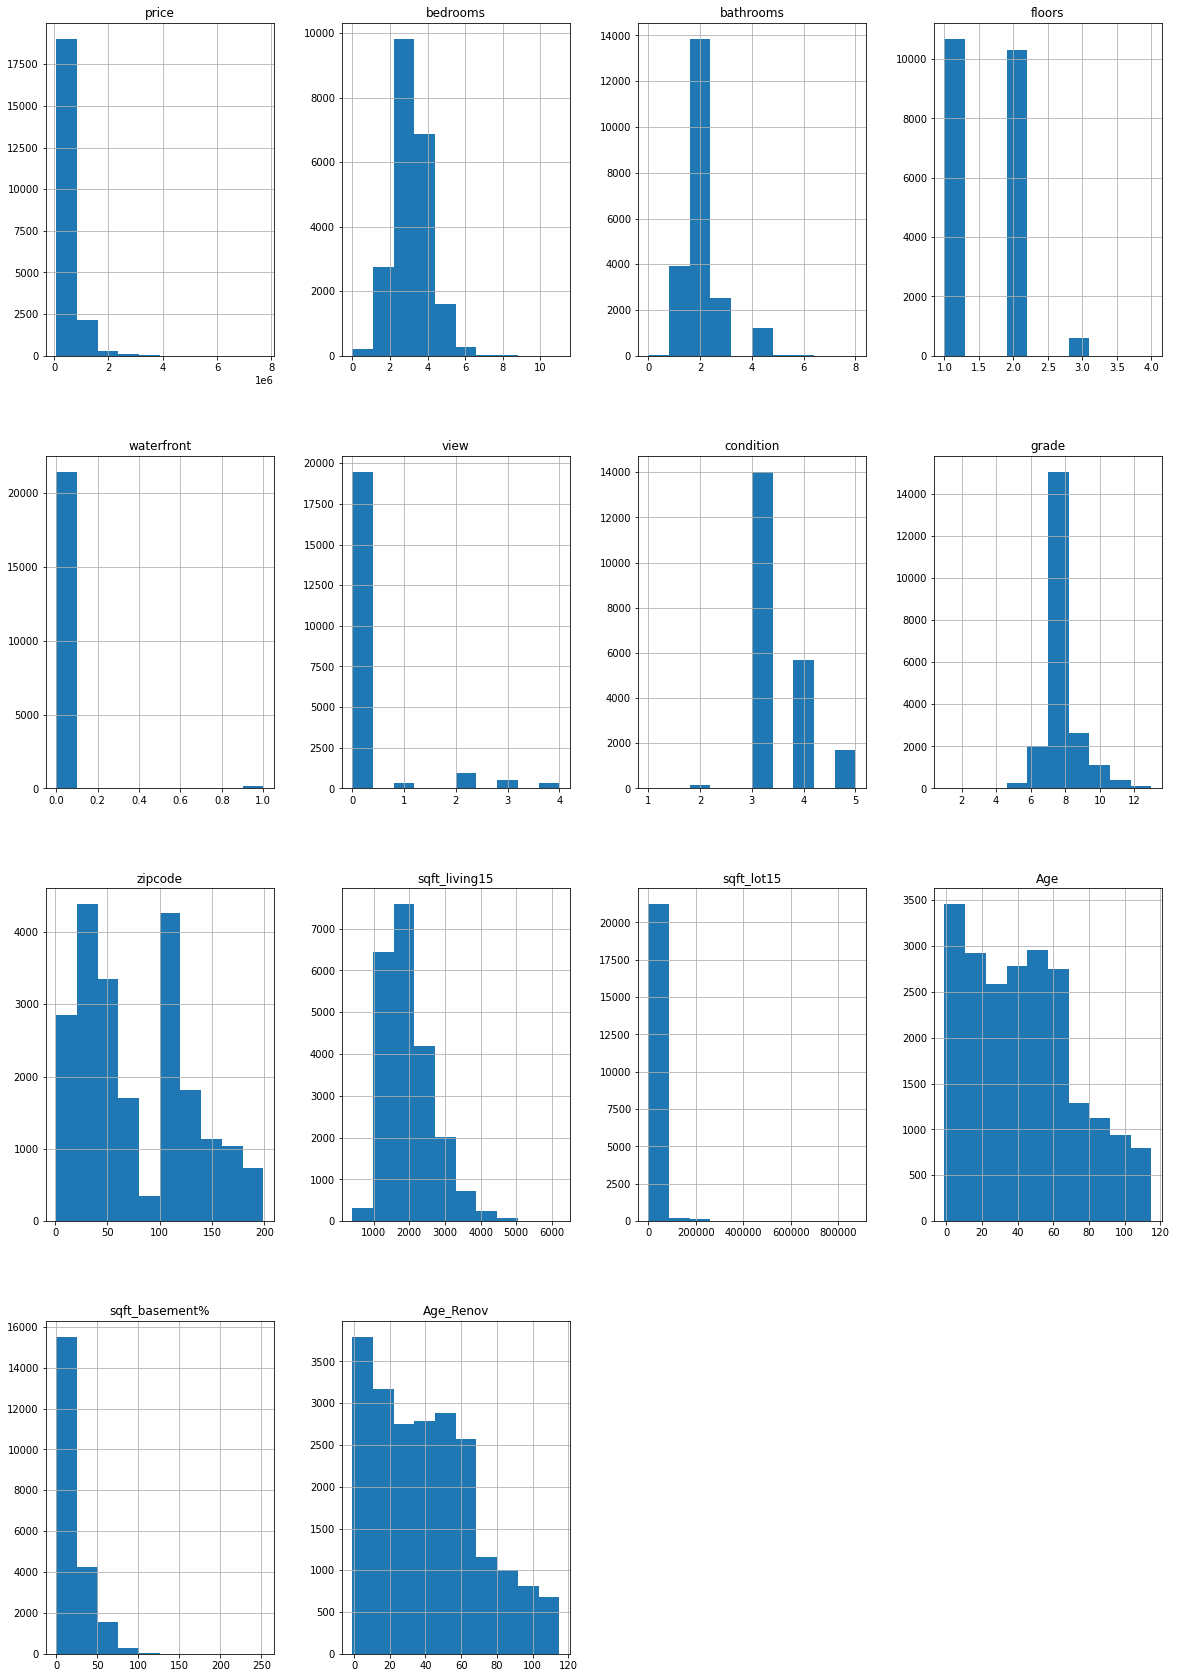

In [15]:
data.hist(figsize=(20,30))
plt.show()

In [16]:
#function to remove outliers
def remove_outlier (x) :
  qr1 = np.percentile(data[x],25)
  qr3 = np.percentile(data[x],75)
  iqr = qr3 - qr1 
  cutoff = iqr*1.5
  lower = qr1 - cutoff
  upper = qr3 + cutoff
  return (lower, upper)

In [17]:
lw, up = remove_outlier("price")
lw1, up1 = remove_outlier("bedrooms")
lw2, up2 = remove_outlier("sqft_basement%")
lw3, up3 = remove_outlier("sqft_lot15")

data = data[(data["price"]>=lw) & (data["price"]<=up)]
data = data[(data["bedrooms"]>=lw1) & (data["bedrooms"]<=up1)]
data = data[(data["sqft_basement%"]>=lw2) & (data["sqft_basement%"]<=up2)]
data = data[(data["sqft_lot15"]>=lw3) & (data["sqft_lot15"]<=up3)]

data

,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_lot15,Age,sqft_basement%,Age_Renov
0,2014,221900.0,3,1.0,1.0,0,0,3,7,178,1340,5650,59,0.000000,59
1,2014,538000.0,3,2.0,2.0,0,0,3,7,125,1690,7639,63,23.668639,23
2,2015,180000.0,2,1.0,1.0,0,0,3,6,28,2720,8062,82,0.000000,82
3,2014,604000.0,4,3.0,1.0,0,0,5,7,136,1360,5000,49,66.911765,49
4,2015,510000.0,3,2.0,1.0,0,0,3,8,74,1800,7503,28,0.000000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014,360000.0,3,2.0,3.0,0,0,3,8,103,1530,1509,5,0.000000,5
21609,2015,400000.0,4,2.0,2.0,0,0,3,8,146,1830,7200,1,0.000000,1
21610,2014,402101.0,2,1.0,2.0,0,0,3,7,144,1020,2007,5,0.000000,5
21611,2015,400000.0,3,2.0,2.0,0,0,3,8,27,1410,1287,11,0.000000,11


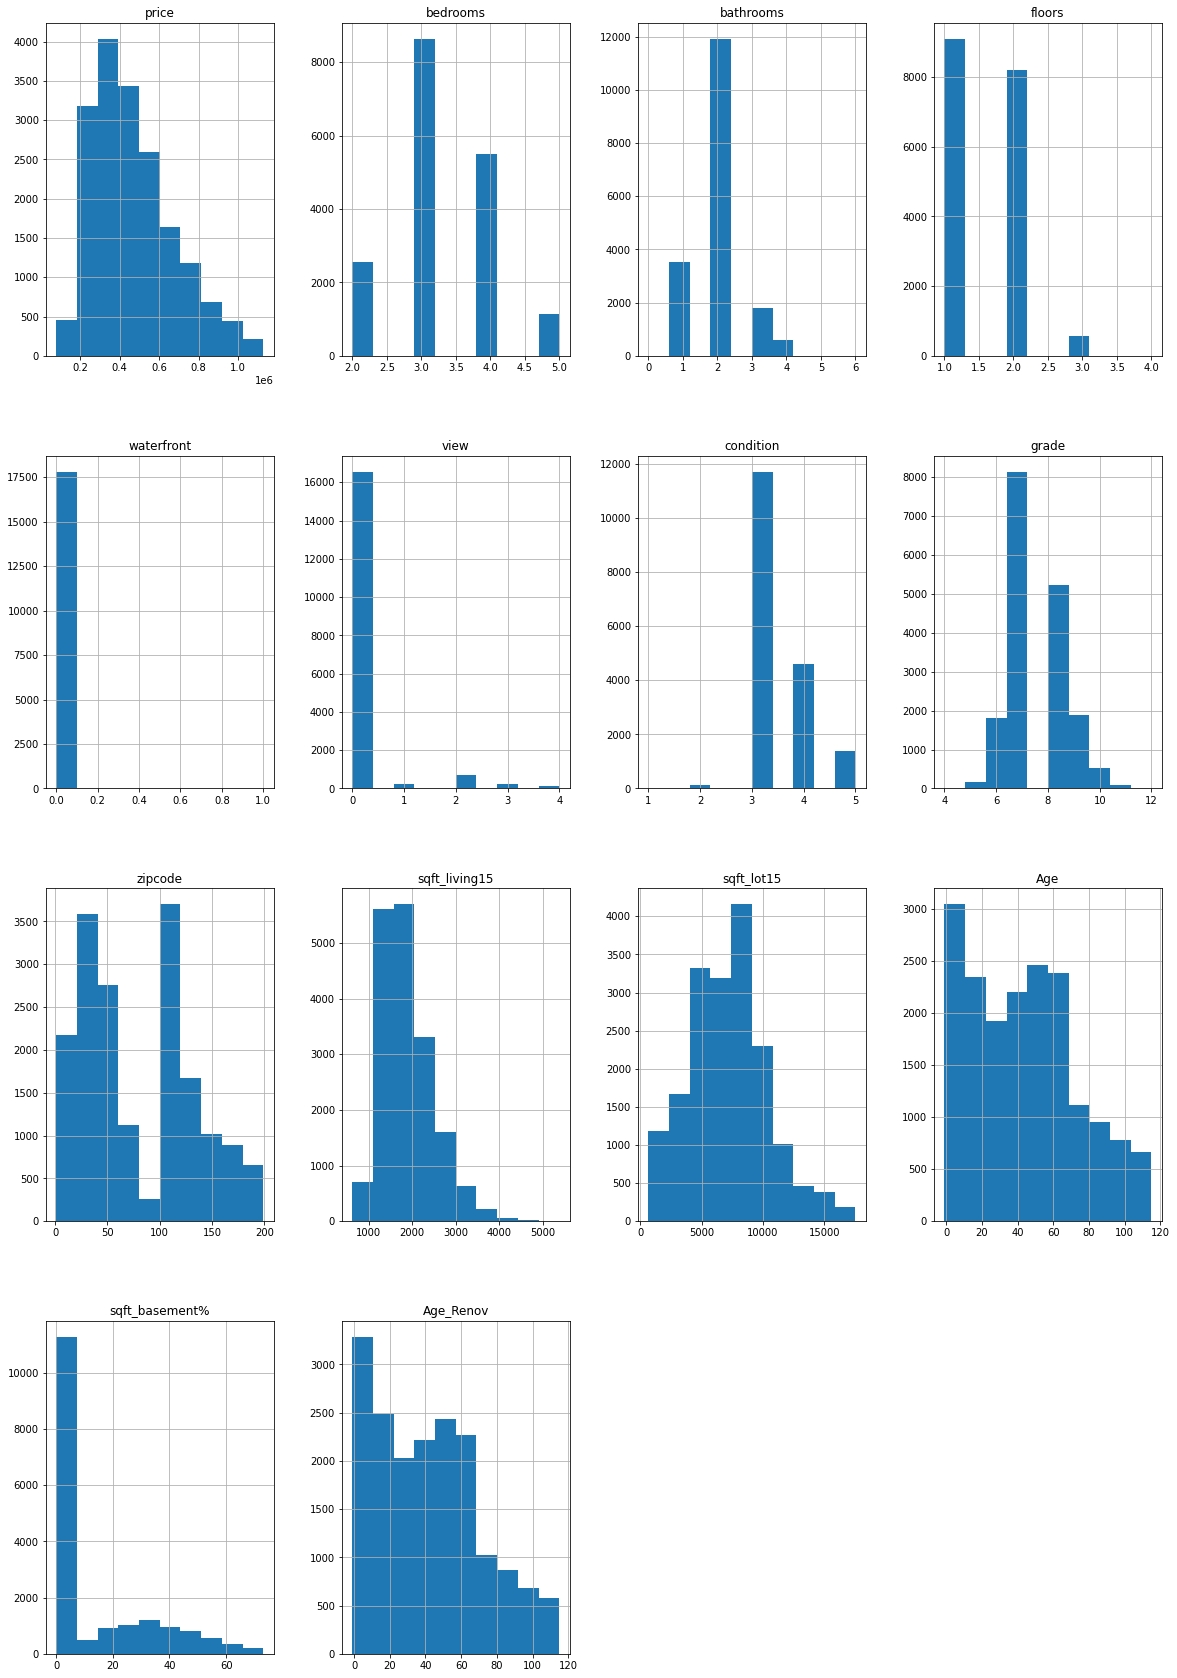

In [18]:
data.hist(figsize=(20,30))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


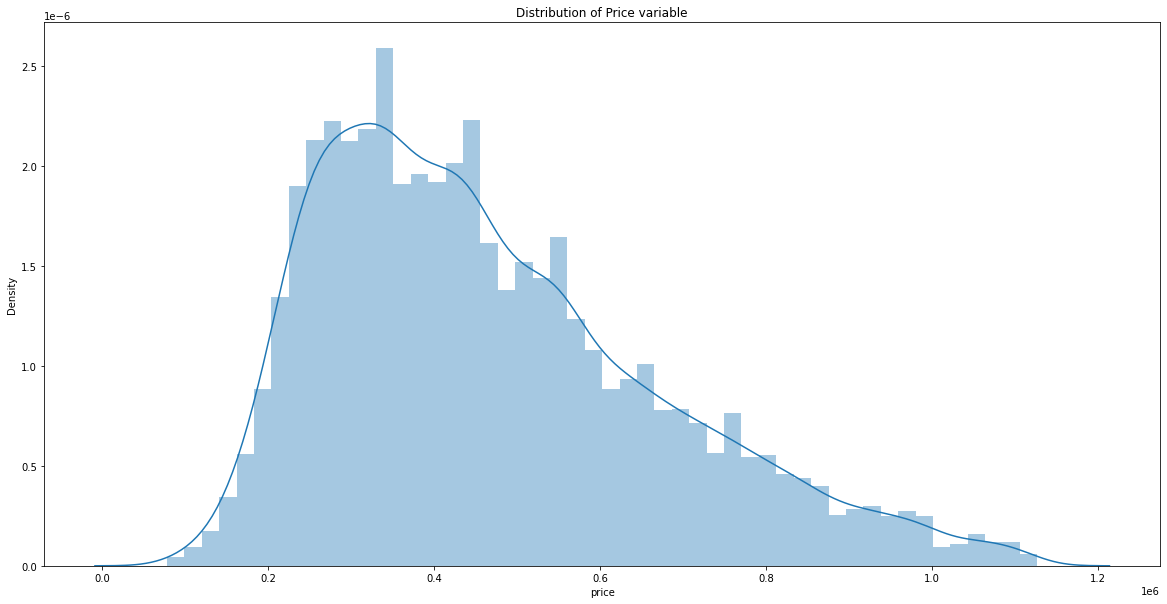

In [19]:
plt.figure(figsize=(20,10))
sns.distplot(data.price, kde=True).set_title('Distribution of Price variable')
plt.show()

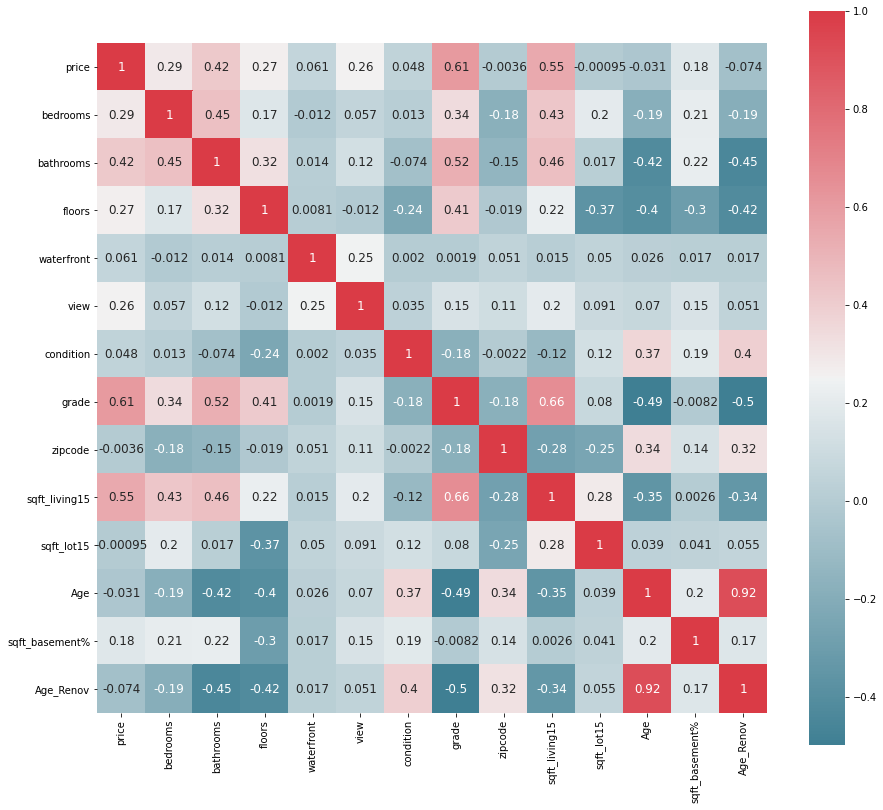

In [20]:
s , ax = plt.subplots( figsize =( 15 , 15 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap( data.corr(), cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )

[Text(0, 0.5, 'Price of the house'), Text(0.5, 0, 'Sqft Living Space')]

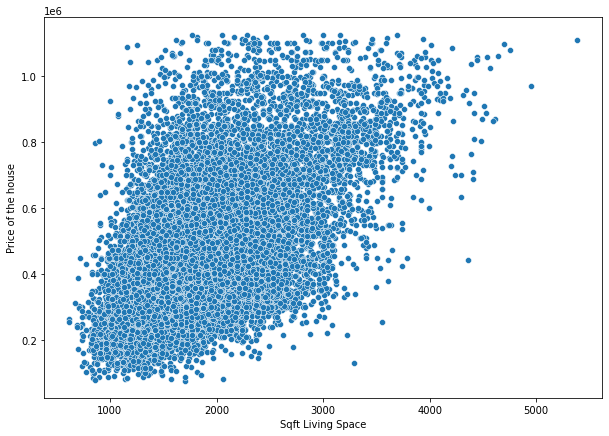

In [21]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living15', y='price', data=data).set(xlabel='Sqft Living Space', ylabel='Price of the house')

In [30]:
#linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics

x=data["sqft_living15"].values[:,np.newaxis]
y=data["price"].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=20, random_state=40)

model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("MSE = ", mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE =  44252530803.9207
R squared:  0.24055658074814978


In [31]:
#multi-linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

x1=data[["sqft_living15", "bedrooms", "grade"]].values[:,np.newaxis]
y1=data["price"].values

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=20, random_state=40)

nsamples, nx, ny = x_train1.shape
d2_x_train1 = x_train1.reshape((nsamples,nx*ny))
nsamples1, nx1, ny1 = x_test1.shape
d2_x_test1 = x_test1.reshape((nsamples1,nx1*ny1))

model1 = LinearRegression()
model1.fit(d2_x_train1, y_train1)
predicted1 = model1.predict(d2_x_test1)

print("MSE = ", mean_squared_error(y_test1, predicted1))
print("R squared: ", metrics.r2_score(y_test1,predicted1))

MSE =  26510804750.87261
R squared:  0.5450326604747068


In [32]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures

x2=data[["sqft_living15", "bedrooms"]]
y2=data["price"]

x_train2, x_test2, y_train2, y_test2 = train_test_split (x2,y2, test_size=20, random_state=40)

model2 = LinearRegression()
poly = PolynomialFeatures( degree=2 )

x_train2_ = poly.fit_transform(x_train2)
model2.fit(x_train2_, y_train2)

x_test2_ = poly.fit_transform(x_test2)
predicted2 = model2.predict(x_test2_)

print("MSE = ", mean_squared_error(y_test2, predicted2))
print("R squared: ", metrics.r2_score(y_test2,predicted2))

MSE =  43505871543.26097
R squared:  0.2533704345917641
